In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [45]:
df=pd.read_csv(r"D:\Datasets\Insure_auto.csv")
df

,Branch,Home,Automobile,Operating_Cost
0,B01,400,1200,124000
1,B02,350,360,71000
2,B03,600,800,136000
3,B04,800,1800,219000
4,B05,900,1600,230000
5,B06,200,1000,75000
6,B07,120,900,56000
7,B08,340,1100,110000
8,B09,490,900,120000
9,B10,700,800,144000


In [46]:
x=df[['Home',"Automobile"]]
y=df['Operating_Cost']
x.shape,y.shape

((10, 2), (10,))

In [47]:
model=LinearRegression()
model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [48]:
model.intercept_,model.coef_[0]

(np.float64(-10084.213130948774), np.float64(167.32668857228617))

In [60]:
x=df['Home']
x=x.to_numpy().reshape(-1,1)
x.shape

(10, 1)

## Transformation

In [61]:
poly=PolynomialFeatures(degree=2,include_bias=False).set_output(transform='pandas')
x_poly=poly.fit_transform(x)


In [81]:
x_poly

,x0,x0^2
0,400.0,160000.0
1,350.0,122500.0
2,600.0,360000.0
3,800.0,640000.0
4,900.0,810000.0
5,200.0,40000.0
6,120.0,14400.0
7,340.0,115600.0
8,490.0,240100.0
9,700.0,490000.0


In [62]:
model.fit(x_poly,y)
model.intercept_,model.coef_

(np.float64(54381.71562081708), array([57.28485112,  0.15387525]))

In [63]:
y_pred=model.intercept_+(model.coef_[0]*x)+(model.coef_[1]*x**2)
y_pred

array([[101915.6960768 ],
       [ 93281.13164386],
       [144147.7163113 ],
       [198689.75655014],
       [230577.03417119],
       [ 71993.69584664],
       [ 63471.70135579],
       [ 91646.5439073 ],
       [119396.74020679],
       [169879.98393018]])

In [64]:
root_mean_squared_error(y,y_pred)

15922.438797444005

In [65]:
r2_score(y,y_pred)

0.9172801092195866

In [80]:
y_model_pred=model.predict(x_poly)
y_model_pred

array([101915.6960768 ,  93281.13164386, 144147.7163113 , 198689.75655014,
       230577.03417119,  71993.69584664,  63471.70135579,  91646.5439073 ,
       119396.74020679, 169879.98393018])

In [98]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,1:-1],df['Operating_Cost'],test_size=0.3,random_state=40)

In [99]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7, 2), (3, 2), (7,), (3,))

In [100]:
model=LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [101]:
y_pred=model.predict(X_test)

In [107]:
y_pred

array([225537.79059964, 219750.64144355, 120336.75264145])

In [108]:
r2_score(y_test,y_pred)

0.9971953259035071

In [117]:
df=pd.read_csv(r"D:\Cases\Concrete_Strength\Concrete_Data.csv")
df

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [118]:
x=df.drop('Strength',axis=1)
y=df['Strength']

In [152]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=25)

## Simple linear regression

In [153]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print("R2 score:",r2_score(y_test,y_pred))
print("Root Mean Squared:",root_mean_squared_error(y_test,y_pred))

R2 score: 0.6351839142464111
Root Mean Squared: 9.968420799205653


##  Polynomial features transformation

In [154]:
poly=PolynomialFeatures(degree=2,include_bias=False).set_output(transform='pandas')
x_poly=poly.fit_transform(X_train)
x_poly.head(5)

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Cement^2,Cement Blast,...,Superplasticizer^2,Superplasticizer Coarse,Superplasticizer Fine,Superplasticizer Age,Coarse^2,Coarse Fine,Coarse Age,Fine^2,Fine Age,Age^2
516,202.0,11.0,141.0,206.0,1.7,942.0,801.0,3.0,40804.00,2222.00,...,2.89,1601.40,1361.70,5.1,887364.00,754542.00,2826.0,641601.00,2403.0,9.0
161,337.9,189.0,0.0,174.9,9.5,944.7,755.8,56.0,114176.41,63863.10,...,90.25,8974.65,7180.10,532.0,892458.09,714004.26,52903.2,571233.64,42324.8,3136.0
1019,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28.0,19516.09,22896.83,...,33.64,5037.88,3802.48,162.4,754465.96,569454.16,24320.8,429811.36,18356.8,784.0
815,525.0,0.0,0.0,189.0,0.0,1125.0,613.0,3.0,275625.00,0.00,...,0.00,0.00,0.00,0.0,1265625.00,689625.00,3375.0,375769.00,1839.0,9.0
870,149.0,139.0,109.0,193.0,6.0,892.0,780.0,28.0,22201.00,20711.00,...,36.00,5352.00,4680.00,168.0,795664.00,695760.00,24976.0,608400.00,21840.0,784.0


In [155]:
model.fit(x_poly,y_train)
y_pred=model.predict(poly.fit_transform(X_test))
print("R2 score:",r2_score(y_test,y_pred))
print("Root Mean Squared:",root_mean_squared_error(y_test,y_pred))

R2 score: 0.7804851192335079
Root Mean Squared: 7.732525414317916


with degree 3

In [156]:
poly=PolynomialFeatures(degree=3,include_bias=False).set_output(transform='pandas')
x_poly=poly.fit_transform(X_train)
model.fit(x_poly,y_train)
y_pred=model.predict(poly.fit_transform(X_test))
print("R2 score:",r2_score(y_test,y_pred))
print("Root Mean Squared:",root_mean_squared_error(y_test,y_pred))

R2 score: 0.7740644562721799
Root Mean Squared: 7.844795961489679


with degree 4 m

In [157]:
poly = PolynomialFeatures(degree=4, include_bias=False).set_output(transform='pandas')
x_poly = poly.fit_transform(X_train)
model.fit(x_poly, y_train)
y_pred = model.predict(poly.fit_transform(X_test))
print("R2 score:", r2_score(y_test, y_pred))
print("Root Mean Squared:", root_mean_squared_error(y_test, y_pred))

R2 score: -46.12099701950962
Root Mean Squared: 113.2913125779827


with degree 5

In [159]:
poly = PolynomialFeatures(degree=5, include_bias=False).set_output(transform='pandas')
x_poly = poly.fit_transform(X_train)
model.fit(x_poly, y_train)
y_pred = model.predict(poly.fit_transform(X_test))
print("R2 score:", r2_score(y_test, y_pred))
print("Root Mean Squared:", root_mean_squared_error(y_test, y_pred))

R2 score: -1171806.8620819633
Root Mean Squared: 17865.59879053827


In [162]:
df=pd.read_csv(r'D:\Datasets\Boston.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [180]:
X_train, X_test, y_train, y_test=train_test_split(df.iloc[:,:-1],df['medv'],test_size=0.30,random_state=25)
# X_train.shape,X_test.shape,y_train.shape,y_test.shape

model=Ridge()
model.fit(X_train,y_train)
mean_absolute_error(y_test,model.predict(X_test))

3.0710068015709453

In [195]:
alpha=[0.001,0.01,0.1,0.5,1,1.5,2,2.5,5,10]
scores=[]
for a in alpha:
    ridge=Ridge(alpha=a)
    ridge.fit(X_train,y_train)
    y_pred=ridge.predict(X_test)
    scores.append([a,mean_absolute_error(y_test,y_pred)])

df_scores=pd.DataFrame(data=scores,columns=['alpha','error'])
df_scores=df_scores.sort_values(by='alpha')

<Axes: xlabel='alpha', ylabel='error'>

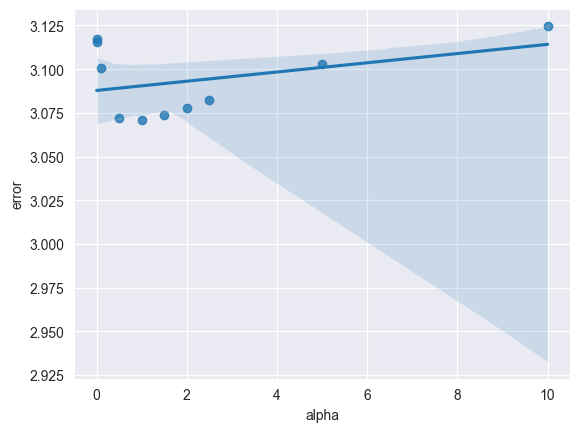

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.regplot(x='alpha',y='error',data=df_scores)

In [198]:
df_scores

,alpha,error
0,0.001,3.117373
1,0.010,3.115621
2,0.100,3.100479
3,0.500,3.072121
4,1.000,3.071007
5,1.500,3.073661
6,2.000,3.077510
7,2.500,3.082563
8,5.000,3.102838
9,10.000,3.124733


## Iterative imputer (model)

In [2]:
df=pd.read_csv(r"D:\Cases\Chemical Process Data\ChemicalProcess.csv")
df

,Yield,BiologicalMaterial01,BiologicalMaterial02,BiologicalMaterial03,BiologicalMaterial04,BiologicalMaterial05,BiologicalMaterial06,BiologicalMaterial07,BiologicalMaterial08,BiologicalMaterial09,...,ManufacturingProcess36,ManufacturingProcess37,ManufacturingProcess38,ManufacturingProcess39,ManufacturingProcess40,ManufacturingProcess41,ManufacturingProcess42,ManufacturingProcess43,ManufacturingProcess44,ManufacturingProcess45
0,38.00,6.25,49.58,56.97,12.74,19.51,43.73,100.0,16.66,11.44,...,0.019,0.5,3,7.2,NaN,NaN,11.6,3.0,1.8,2.4
1,42.44,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.019,2.0,2,7.2,0.1,0.15,11.1,0.9,1.9,2.2
2,42.03,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.018,0.7,2,7.2,0.0,0.00,12.0,1.0,1.8,2.3
3,41.42,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.018,1.2,2,7.2,0.0,0.00,10.6,1.1,1.8,2.1
4,42.49,7.47,63.33,72.25,14.02,17.91,54.66,100.0,18.22,12.80,...,0.017,0.2,2,7.3,0.0,0.00,11.0,1.1,1.7,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,39.66,6.71,56.32,66.19,12.35,20.02,50.26,100.0,17.54,12.50,...,NaN,2.3,0,0.0,0.0,0.00,0.0,0.6,0.0,0.0
172,39.68,6.87,56.74,66.61,12.55,20.18,50.80,100.0,17.48,12.41,...,NaN,1.0,0,0.0,0.0,0.00,0.0,0.6,0.0,0.0
173,42.23,7.50,58.41,68.30,13.33,20.81,52.96,100.0,17.23,12.04,...,NaN,1.3,0,0.0,0.0,0.00,0.0,0.6,0.0,0.0
174,38.48,7.53,58.36,69.25,14.35,20.57,51.31,100.0,17.87,12.77,...,NaN,2.3,0,0.0,0.0,0.00,0.0,0.5,0.0,0.0


In [7]:
df.isnull().sum().sum()

np.int64(106)

In [10]:
x=df.iloc[:,1:]
y=df['Yield']

X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.30)

In [14]:
imputer=IterativeImputer(initial_strategy='mean',random_state=25)
X_trn_imp=imputer.fit_transform(X_train)
X_tst_imp=imputer.fit_transform(X_test)
lr=LinearRegression()
lr.fit(X_trn_imp,y_train)
y_pred=lr.predict(X_tst_imp)
mean_absolute_error(y_test,y_pred)

7.017810573593858